In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
import numpy as np
import pandas as pd
import os
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
os.chdir("C:/Users/TANIA DAS/Downloads")
car=pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [58]:
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [59]:
car.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [60]:
car.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [61]:
car.shape

(4340, 8)

In [62]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [63]:
car.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [64]:
car.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


Text(0.5, 0, 'KM_DRIVEN')

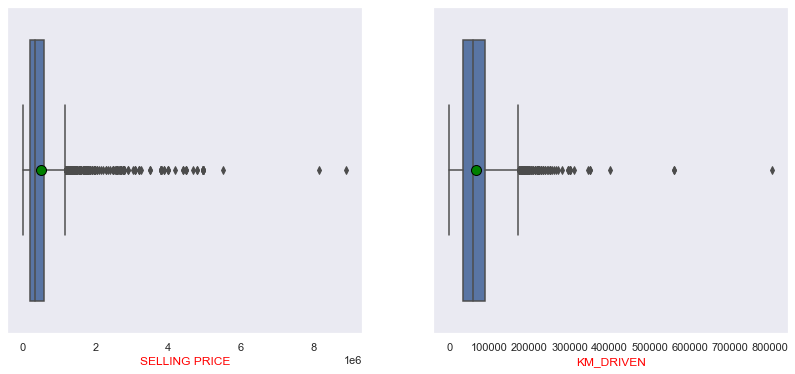

In [65]:
sns.set(style='dark')
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(car['selling_price'],showmeans=True,meanprops={"marker":'o',"markerfacecolor":"green","markeredgecolor":"black","markersize":10})
plt.xlabel('SELLING PRICE',fontdict={'color':'red','fontsize':12})

plt.subplot(1,2,2)
sns.boxplot(car['km_driven'],showmeans=True,meanprops={"marker":'o',"markerfacecolor":"green","markeredgecolor":"black","markersize":10})
plt.xlabel('KM_DRIVEN',fontdict={'color':'red','fontsize':12})

In [66]:
print(car['selling_price'].quantile(0.10))
print(car['selling_price'].quantile(0.90))

110900.00000000003
900000.0


In [67]:
car['selling_price']=np.where(car['selling_price']<110900.00000000003,110900.00000000003,car['selling_price'])
car['selling_price']=np.where(car['selling_price']>900000.0,900000.0,car['selling_price'])

In [68]:
print(car['km_driven'].quantile(0.10))
print(car['km_driven'].quantile(0.90))

15000.0
120000.0


In [69]:
car['km_driven']=np.where(car['km_driven']<15000.0,15000.0,car['km_driven'])
car['km_driven']=np.where(car['km_driven']>120000.0,120000.0,car['km_driven'])

Text(0.5, 0, 'KM_DRIVEN')

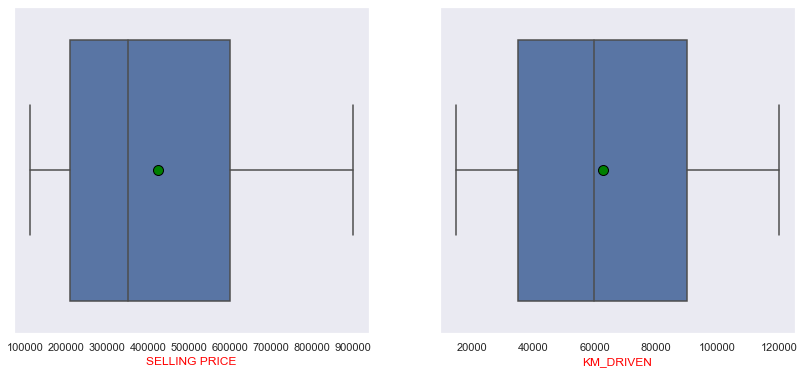

In [70]:
sns.set(style='dark')
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(car['selling_price'],showmeans=True,meanprops={"marker":'o',"markerfacecolor":"green","markeredgecolor":"black","markersize":10})
plt.xlabel('SELLING PRICE',fontdict={'color':'red','fontsize':12})

plt.subplot(1,2,2)
sns.boxplot(car['km_driven'],showmeans=True,meanprops={"marker":'o',"markerfacecolor":"green","markeredgecolor":"black","markersize":10})
plt.xlabel('KM_DRIVEN',fontdict={'color':'red','fontsize':12})

In [82]:
df=car.iloc[:,[2,3]]
corr_data=df.corr()
print(corr_data)

               selling_price  km_driven
selling_price       1.000000  -0.308051
km_driven          -0.308051   1.000000


Text(0, 0.5, 'COUNT')

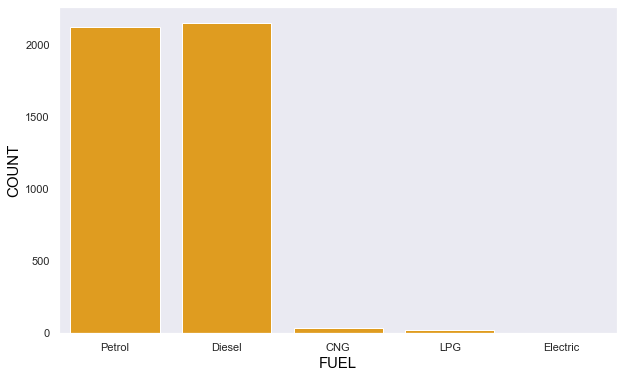

In [73]:
sns.set(style='dark')
plt.subplots(figsize=(10,6))
sns.countplot(car['fuel'],color='orange')
plt.xlabel("FUEL",fontdict={'color':'black','fontsize':15})
plt.ylabel("COUNT",fontdict={'color':'black','fontsize':15})

Text(0, 0.5, 'COUNT')

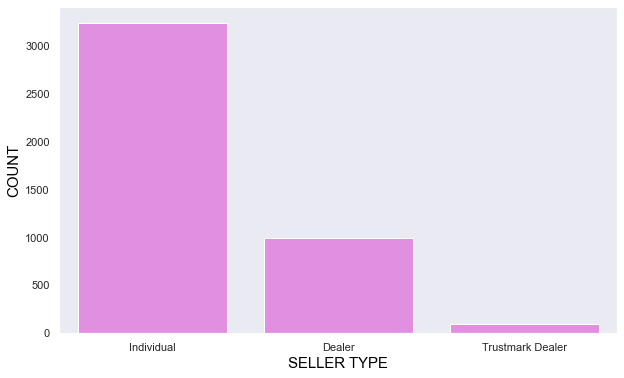

In [74]:
sns.set(style='dark')
plt.subplots(figsize=(10,6))
sns.countplot(car['seller_type'],color='violet')
plt.xlabel("SELLER TYPE",fontdict={'color':'black','fontsize':15})
plt.ylabel("COUNT",fontdict={'color':'black','fontsize':15})

Text(0, 0.5, 'COUNT')

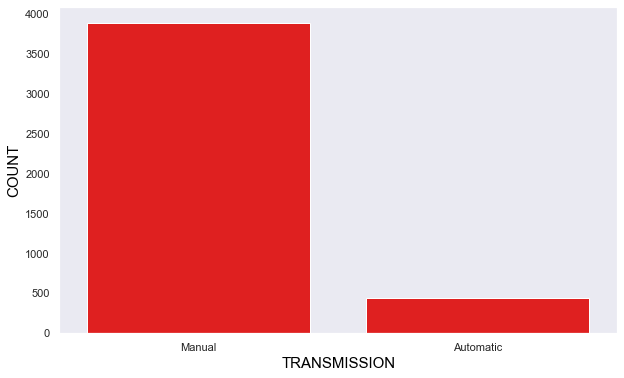

In [75]:
sns.set(style='dark')
plt.subplots(figsize=(10,6))
sns.countplot(car['transmission'],color='red')
plt.xlabel("TRANSMISSION",fontdict={'color':'black','fontsize':15})
plt.ylabel("COUNT",fontdict={'color':'black','fontsize':15})

Text(0, 0.5, 'COUNT')

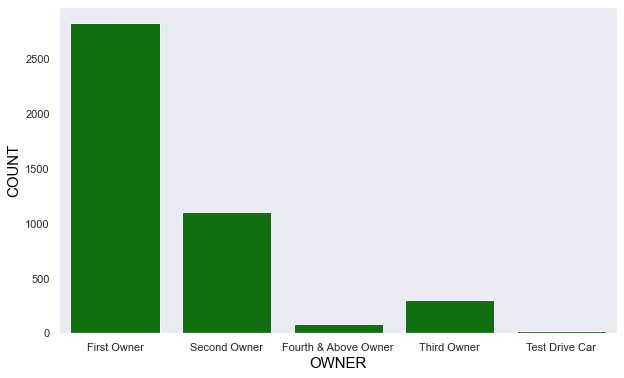

In [76]:
sns.set(style='dark')
plt.subplots(figsize=(10,6))
sns.countplot(car['owner'],color='green')
plt.xlabel("OWNER",fontdict={'color':'black','fontsize':15})
plt.ylabel("COUNT",fontdict={'color':'black','fontsize':15})

Text(0, 0.5, 'FREQUENCY')

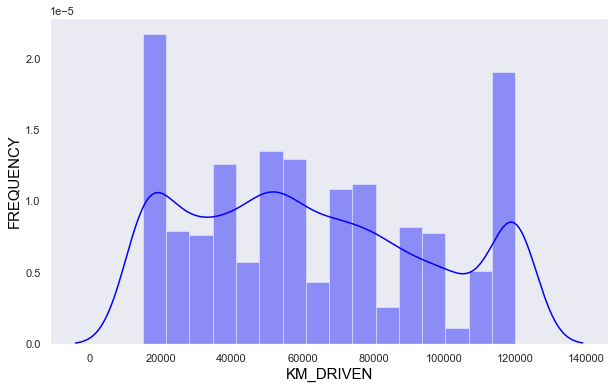

In [81]:
sns.set(style='dark')
plt.subplots(figsize=(10,6))
sns.distplot(car['km_driven'],color='blue')
plt.xlabel("KM_DRIVEN",fontdict={'color':'black','fontsize':15})
plt.ylabel("FREQUENCY",fontdict={'color':'black','fontsize':15})

Text(0.5, 1.0, 'RELATIONSHIP BETWEEN KILOMETER DRIVEN AND PRICE')

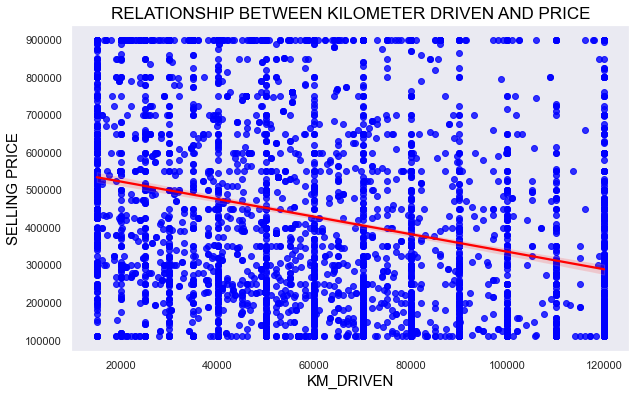

In [80]:
sns.set(style='dark')
plt.subplots(figsize=(10,6))
sns.regplot(x=car['km_driven'],y=car['selling_price'],color='blue',line_kws={'color':'red'})
plt.xlabel("KM_DRIVEN",fontdict={'color':'black','fontsize':15})
plt.ylabel("SELLING PRICE",fontdict={'color':'black','fontsize':15})
plt.title("RELATIONSHIP BETWEEN KILOMETER DRIVEN AND PRICE",fontdict={'color':'black','fontsize':17})

In [92]:
dummy=pd.get_dummies(car[["fuel","seller_type","transmission","owner"]])

In [93]:
car=pd.concat([car,dummy],axis=1)

In [97]:
car=car.drop(['fuel','seller_type','transmission','owner'],axis=1)

In [105]:
car=car.drop(['name'],axis=1)

In [106]:
car.head()

,year,selling_price,km_driven,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,110900.0,70000.0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
1,2007,135000.0,50000.0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
2,2012,600000.0,100000.0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0
3,2017,250000.0,46000.0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
4,2014,450000.0,120000.0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0


In [107]:
ind=car.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]
dep=car.iloc[:,1]

In [108]:
X_train,X_test,y_train,y_test=train_test_split(ind,dep,test_size=0.2,random_state=0)

In [109]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3472, 17)
(3472,)
(868, 17)
(868,)


Text(0, 0.5, 'FREQUENCY')

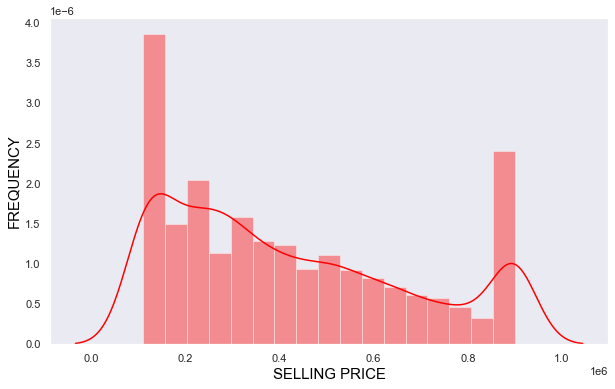

In [110]:
sns.set(style='dark')
plt.subplots(figsize=(10,6))
sns.distplot(car['selling_price'],color='red')
plt.xlabel("SELLING PRICE",fontdict={'color':'black','fontsize':15})
plt.ylabel("FREQUENCY",fontdict={'color':'black','fontsize':15})

In [111]:
X_test=sm.add_constant(X_test)
X_train=sm.add_constant(X_train)

In [112]:
fitting=sm.OLS(y_train,X_train).fit()
y_pred=fitting.predict(X_test)
fitting.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     390.8
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        12:54:01   Log-Likelihood:                -46586.
No. Observations:                3472   AIC:                         9.320e+04
Df Residuals:                    3458   BIC:                         9.329e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -2.438e+07   7.71e+05    -31.611      0.000   -2.59e+07   -2.29e+07
year                          2.733e+04    854.477     31.989      0.000    2.57e+04     2.9e+04
km_driven                       -0.8359      0.107     -7.820      0.000      -1.045      -0.626
fuel_CNG                     -4.934e+06   1.61e+05    -30.678      0.000   -5.25e+06   -4.62e+06
fuel_Diesel                  -4.717e+06   1.59e+05    -29.611      0.000   -5.03e+06   -4.41e+06
fuel_Electric                -4.928e+06   2.01e+05    -24.516      0.000   -5.32e+06   -4.53e+06
fuel_LPG                     -4.906e+06    1.6e+05    -30.680      0.000   -5.22e+06   -4.59e+06
fuel_Petrol                  -4.893e+06   1.57e+05    -31.075      0.000    -5.2e+06   -4.58e+06
seller_type_Dealer           -8.161e+06   2.57e+05    -31.789      0.000   -8.66e+06   -7.66e+06
seller_type_Individual       -8.197e+06   2.57e+05    -31.883      0.000    -8.7e+06   -7.69e+06
seller_type_Trustmark Dealer  -8.02e+06   2.58e+05    -31.105      0.000   -8.53e+06   -7.51e+06
transmission_Automatic       -1.208e+07   3.86e+05    -31.299      0.000   -1.28e+07   -1.13e+07
transmission_Manual           -1.23e+07   3.85e+05    -31.920      0.000   -1.31e+07   -1.15e+07
owner_First Owner            -4.896e+06   1.56e+05    -31.433      0.000    -5.2e+06   -4.59e+06
owner_Fourth & Above Owner   -4.912e+06   1.52e+05    -32.250      0.000   -5.21e+06   -4.61e+06
owner_Second Owner           -4.922e+06   1.54e+05    -31.975      0.000   -5.22e+06   -4.62e+06
owner_Test Drive Car          -4.72e+06   1.63e+05    -28.891      0.000   -5.04e+06    -4.4e+06
owner_Third Owner            -4.928e+06   1.53e+05    -32.207      0.000   -5.23e+06   -4.63e+06
==============================================================================
Omnibus:                      124.900   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.750
Skew:                           0.480   Prob(JB):                     1.22e-30
Kurtosis:                       3.178   Cond. No.                     1.36e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.65e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [114]:
df1=pd.DataFrame()
df1['vif']=[variance_inflation_factor(X_train.values,j) for j in range(X_train.shape[1])]
df1['Features']=X_train.columns
display(df1)

,vif,Features
0,0.000000,const
1,1.692889,year
2,1.719848,km_driven
3,inf,fuel_CNG
4,inf,fuel_Diesel
5,inf,fuel_Electric
6,inf,fuel_LPG
7,inf,fuel_Petrol
8,inf,seller_type_Dealer
9,inf,seller_type_Individual


In [115]:
import math
from sklearn import metrics
rmse=math.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)

166314.92711047677


Text(0.5, 1.0, 'ACTUAL PRICE VS PREDICTED PRICE')

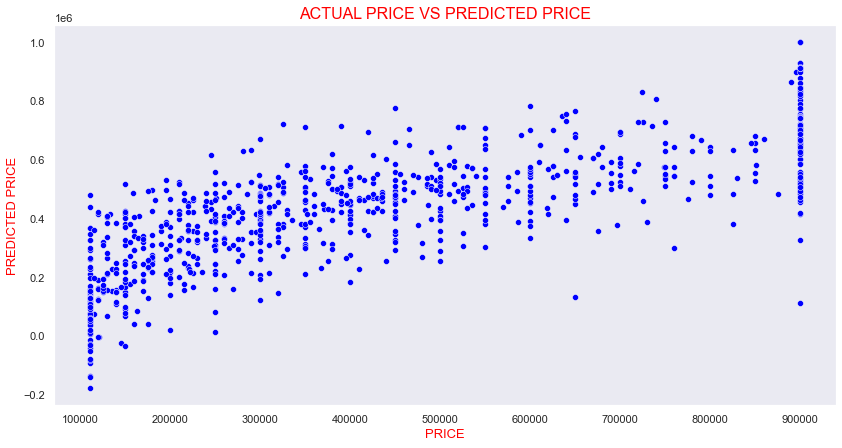

In [119]:
sns.set(style='dark')
plt.subplots(figsize=(14,7))
sns.scatterplot(x=y_test,y=y_pred,color='blue')
plt.xlabel("PRICE",fontdict={'color':'red','fontsize':13})
plt.ylabel("PREDICTED PRICE",fontdict={'color':'red','fontsize':13})
plt.title("ACTUAL PRICE VS PREDICTED PRICE",fontdict={'color':'red','fontsize':16})